In [76]:
#Import dependicies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import scipy.stats as sts

In [77]:
 # Name of the CSV file
file = 'Resources/countries_of_the_world.csv'

In [78]:
# The correct encoding must be used to read the CSV in pandas
df = pd.read_csv(file, encoding="ISO-8859-1")

In [79]:
#Preview the dataframe
df.head()

# Create dataframe with commas converted to decimales of the DataFrame
#country_df = df.str.replace(',','.')
#country_df.head()

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                             163,07               700.0   
1         -4,93                              21,52              4500.0   
2         -0,39                                 31              6000.0   
3        -20,71                               9,27              8000.0   
4           6,6                               4,05             19000.0   

  Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0         36,0               3,2      12,13      0,22     87,65       1   
1         86,5              71,2      21,09      4,42     74,49       3   
2         70,0              78,1       3,22      0,25     96,53       1   
3         97,0             259,5         10        15        75       2   
4        100,0             497,2       2,22         0     97,78       3   

  Birthrate Deathrate Agriculture Industry Service  
0      46,6     20,34        0,38     0,24    0,38  
1     15,11      5,22       0,232    0,188   0,579  
2     17,14      4,61       0,101      0,6   0,298  
3     22,46      3,27         NaN      NaN     NaN  
4      8,71      6,25         NaN      NaN     NaN

In [80]:
#Create a dataframe with just the data that you need
area_df = df[['Country','Region','Area (sq. mi.)']]
area_df
area_df_grouped = area_df.groupby(['Region'])

area_totaled = area_df_grouped.sum()['Area (sq. mi.)']
area_totaled

area_totaled_df = area_totaled.reset_index()
area_totaled_df

Region  Area (sq. mi.)
0         ASIA (EX. NEAR EAST)                 23096712
1   BALTICS                                      175015
2                  C.W. OF IND. STATES         22100843
3   EASTERN EUROPE                              1152222
4               LATIN AMER. & CARIB            20544084
5   NEAR EAST                                   4355586
6   NORTHERN AFRICA                             6018890
7   NORTHERN AMERICA                           21782471
8   OCEANIA                                     8519812
9   SUB-SAHARAN AFRICA                         24341406
10  WESTERN EUROPE                              3710478

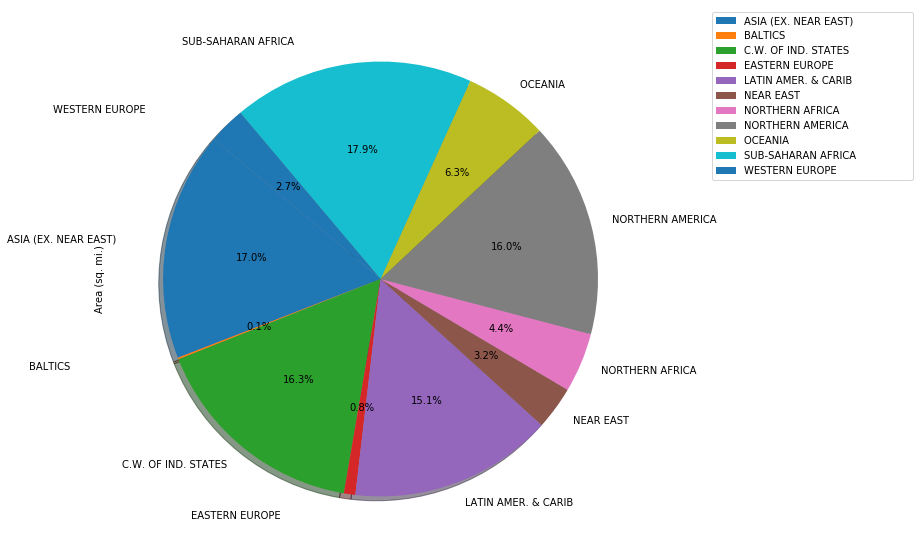

In [81]:
#Create a pie graph that displayed the data from the area dataframe
plot = area_totaled_df.plot.pie(y='Area (sq. mi.)', figsize=(10, 10), labels=area_totaled_df['Region'], 
                                autopct="%1.1f%%", shadow=True, startangle=140).legend(bbox_to_anchor=(1.1, 1))


In [82]:
#Create a dataframe from the original data that includes country, region, literacy %, phones per 1000, and population
new_df = df[['Country','Region','Population', 'Literacy (%)', 'Phones (per 1000)']]
new_df.head()

#Convert commas to decimals for literacy % and phones per 1000
literacy_converted= new_df['Literacy (%)'].str.replace(',','.')
literacy =  literacy_converted.astype(float)
phones_converted=new_df['Phones (per 1000)'].str.replace(',','.')
phones =  phones_converted.astype(float)
#phones 

In [83]:
#Create DF to show just the columns you will plot
phone_literacy_df = pd.DataFrame({'Country': country, 'Literacy': literacy, 'Phones': phones})
phone_literacy_df


#Remove all rows that do not have value:
phone_literacy_filtered = phone_literacy_df.dropna()
print(len(phone_literacy_filtered))
phone_literacy_filtered

#Create DF for only rows that are numeric:
phone_literacy_numeric = phone_literacy_filtered[['Literacy', 'Phones']]
#print(phone_literacy_numeric)
phone_literacy_numeric

206


Literacy  Phones
0        36.0     3.2
1        86.5    71.2
2        70.0    78.1
3        97.0   259.5
4       100.0   497.2
..        ...     ...
219      90.3   187.7
221      50.0   118.6
224      50.2    37.2
225      80.6     8.2
226      90.7    26.8

[206 rows x 2 columns]

In [84]:
#Create two separate list variables for the x and y axis - one for country vs literacy % and one for country vs phones per 1000
literacy = phone_literacy_numeric['Literacy']


phones = phone_literacy_numeric['Phones']

#print(len(literacy))
#print(len(phones))

print(literacy)
print(phones)

0       36.0
1       86.5
2       70.0
3       97.0
4      100.0
       ...  
219     90.3
221     50.0
224     50.2
225     80.6
226     90.7
Name: Literacy, Length: 206, dtype: float64
0        3.2
1       71.2
2       78.1
3      259.5
4      497.2
       ...  
219    187.7
221    118.6
224     37.2
225      8.2
226     26.8
Name: Phones, Length: 206, dtype: float64


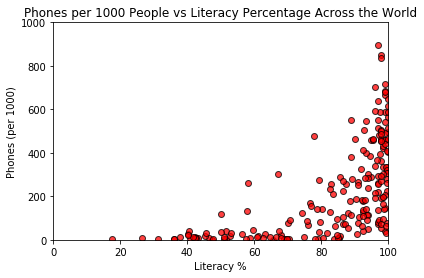

In [85]:
#Graph the data in a scatter plot

plt.scatter(literacy, phones, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('Literacy %')
plt.ylabel('Phones (per 1000)')
plt.title('Phones per 1000 People vs Literacy Percentage Across the World')
plt.figsize=(200,200)


# format the x and y ticks
#plt.xticks([]),plt.yticks([])
plt.xlim(0,100)
plt.ylim(0,1000)
plt.show()

#correlation = st.pearsonr(literacy,phones)
#print(correlation)

y = 6.65x + -325.28


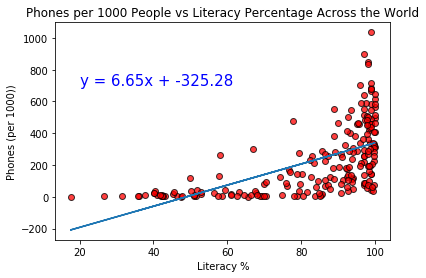

In [86]:
#Create a regression across the above scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(literacy, phones)
regress_values = literacy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(literacy, phones, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
print(line_eq)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(20,700),fontsize=15,color="blue")
plt.xlabel('Literacy %')
plt.ylabel('Phones (per 1000))')
plt.title('Phones per 1000 People vs Literacy Percentage Across the World')
plt.figsize=(200,200)
plt.show()

In [87]:
#Show various statistics (mean, median, highest, lowest) for each column in dataframe grouped by region.
df.head()

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                             163,07               700.0   
1         -4,93                              21,52              4500.0   
2         -0,39                                 31              6000.0   
3        -20,71                               9,27              8000.0   
4           6,6                               4,05             19000.0   

  Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0         36,0               3,2      12,13      0,22     87,65       1   
1         86,5              71,2      21,09      4,42     74,49       3   
2         70,0              78,1       3,22      0,25     96,53       1   
3         97,0             259,5         10        15        75       2   
4        100,0             497,2       2,22         0     97,78       3   

  Birthrate Deathrate Agriculture Industry Service  
0      46,6     20,34        0,38     0,24    0,38  
1     15,11      5,22       0,232    0,188   0,579  
2     17,14      4,61       0,101      0,6   0,298  
3     22,46      3,27         NaN      NaN     NaN  
4      8,71      6,25         NaN      NaN     NaN

In [90]:
#Group the df by region
grouped_df = df.groupby(['Region'])

#See how many results remain in each category
grouped_df.count()

Country  Population  Area (sq. mi.)  \
Region                                                                     
ASIA (EX. NEAR EAST)                      28          28              28   
BALTICS                                    3           3               3   
C.W. OF IND. STATES                       12          12              12   
EASTERN EUROPE                            12          12              12   
LATIN AMER. & CARIB                       45          45              45   
NEAR EAST                                 16          16              16   
NORTHERN AFRICA                            6           6               6   
NORTHERN AMERICA                           5           5               5   
OCEANIA                                   21          21              21   
SUB-SAHARAN AFRICA                        51          51              51   
WESTERN EUROPE                            28          28              28   

                                     Pop. Density (per sq. mi.)  \
Region                                                            
ASIA (EX. NEAR EAST)                                         28   
BALTICS                                                       3   
C.W. OF IND. STATES                                          12   
EASTERN EUROPE                                               12   
LATIN AMER. & CARIB                                          45   
NEAR EAST                                                    16   
NORTHERN AFRICA                                               6   
NORTHERN AMERICA                                              5   
OCEANIA                                                      21   
SUB-SAHARAN AFRICA                                           51   
WESTERN EUROPE                                               28   

                                     Coastline (coast/area ratio)  \
Region                                                              
ASIA (EX. NEAR EAST)                                           28   
BALTICS                                                         3   
C.W. OF IND. STATES                                            12   
EASTERN EUROPE                                                 12   
LATIN AMER. & CARIB                                            45   
NEAR EAST                                                      16   
NORTHERN AFRICA                                                 6   
NORTHERN AMERICA                                                5   
OCEANIA                                                        21   
SUB-SAHARAN AFRICA                                             51   
WESTERN EUROPE                                                 28   

                                     Net migration  \
Region                                               
ASIA (EX. NEAR EAST)                            28   
BALTICS                                          3   
C.W. OF IND. STATES                             12   
EASTERN EUROPE                                  12   
LATIN AMER. & CARIB                             45   
NEAR EAST                                       16   
NORTHERN AFRICA                                  5   
NORTHERN AMERICA                                 5   
OCEANIA                                         19   
SUB-SAHARAN AFRICA                              51   
WESTERN EUROPE                                  28   

                                     Infant mortality (per 1000 births)  \
Region                                                                    
ASIA (EX. NEAR EAST)                                                 28   
BALTICS                                                               3   
C.W. OF IND. STATES                                                  12   
EASTERN EUROPE                                                       12   
LATIN AMER. & CARIB                                                  45   
NEAR EAST                                         

In [94]:
#Complete statistical analysis on the DF grouped by region
grouped_df.describe().round()

Population                            \
                                         count         mean          std   
Region                                                                     
ASIA (EX. NEAR EAST)                      28.0  131713651.0  310261018.0   
BALTICS                                    3.0    2394991.0    1135572.0   
C.W. OF IND. STATES                       12.0   23340129.0   39734504.0   
EASTERN EUROPE                            12.0    9992893.0   10542456.0   
LATIN AMER. & CARIB                       45.0   12484991.0   32353969.0   
NEAR EAST                                 16.0   12191774.0   18196450.0   
NORTHERN AFRICA                            6.0   26901189.0   29013489.0   
NORTHERN AMERICA                           5.0   66334461.0  130540408.0   
OCEANIA                                   21.0    1577698.0    4519602.0   
SUB-SAHARAN AFRICA                        51.0   14694843.0   23091893.0   
WESTERN EUROPE                            28.0   14155000.0   23158786.0   

                                                                       \
                                           min        25%         50%   
Region                                                                  
ASIA (EX. NEAR EAST)                  359008.0  5899398.0  26336502.0   
BALTICS                              1324333.0  1799534.0   2274735.0   
C.W. OF IND. STATES                  2976372.0  4947558.0   7641217.0   
EASTERN EUROPE                       2010347.0  4266476.0   6412408.0   
LATIN AMER. & CARIB                     9439.0   117848.0   1065842.0   
NEAR EAST                             698585.0  2170984.0   3488140.0   
NORTHERN AFRICA                       273008.0  6969319.0  21552552.0   
NORTHERN AMERICA                        7026.0    56361.0     65773.0   
OCEANIA                                11810.0    57794.0    114689.0   
SUB-SAHARAN AFRICA                      7502.0  1540931.0   8090068.0   
WESTERN EUROPE                         27928.0    74381.0   4921096.0   

                                                              Area (sq. mi.)  \
                                            75%           max          count   
Region                                                                         
ASIA (EX. NEAR EAST)                 85669394.0  1.313974e+09           28.0   
BALTICS                               2930320.0  3.585906e+06            3.0   
C.W. OF IND. STATES                  18251716.0  1.428935e+08           12.0   
EASTERN EUROPE                       10044864.0  3.853687e+07           12.0   
LATIN AMER. & CARIB                   8989046.0  1.880782e+08           45.0   
NEAR EAST                            19525068.0  7.041396e+07           16.0   
NORTHERN AFRICA                      33163467.0  7.888701e+07            6.0   
NORTHERN AMERICA                     33098932.0  2.984442e+08            5.0   
OCEANIA                                274578.0  2.026408e+07           21.0   
SUB-SAHARAN AFRICA                   15621837.0  1.318597e+08           51.0   
WESTERN EUROPE                       10626417.0  8.242230e+07           28.0   

                                                ...                         \
                                          mean  ...        75%         max   
Region                                          ...                          
ASIA (EX. NEAR EAST)                  824883.0  ...   655250.0   9596960.0   
BALTICS                                58338.0  ...    64894.0     65200.0   
C.W. OF IND. STATES                  1841737.0  ...   517000.0  17075200.0   
EASTERN EUROPE                         96018.0  ...    97500.0    312685.0   
LATIN AMER. & CARIB                   456535.0  ...   176220.0   8511965.0   
NEAR EAST                             272224.0  ...   268613.0   1960582.0   
NORTHERN AFRICA                      1003148.0  ...  1570018.0   2381740.0   
NORTHERN AMERICA                     4356494.0 